# 1. 数据可视化

In [2]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import scipy.io as sio

# data1

In [3]:
mat = sio.loadmat('./data/ex7data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [4]:
data1 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])

In [5]:
data1.head()

,X1,X2
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


In [7]:
sns.set(context = "notebook", style = "white")

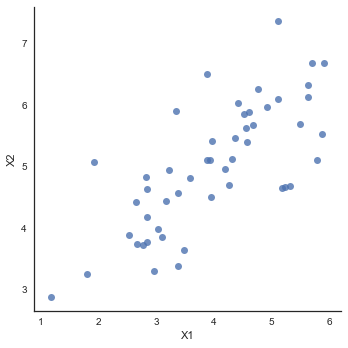

In [8]:
sns.lmplot('X1', 'X2', data= data1, fit_reg=False)
plt.show()

# data2

In [9]:
mat = sio.loadmat('./data/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])

In [12]:
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


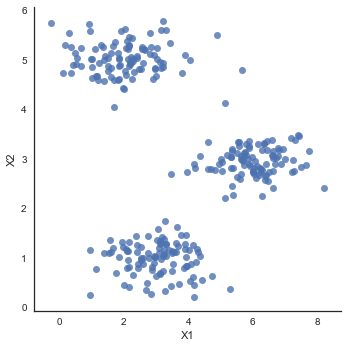

In [14]:
sns.lmplot('X1', 'X2', data= data2, fit_reg=False)
plt.show()

# 2-2维kmeans

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.io as sio

In [17]:
mat = sio.loadmat('./data/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
print(data2.head())

         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


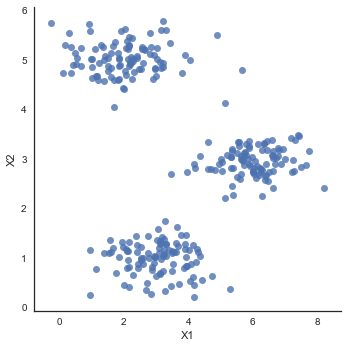

In [20]:
sns.set(context='notebook', style="white")
sns.lmplot('X1','X2', data=data2, fit_reg=False)
plt.show()

# 0. random init
for initial centroids

In [42]:
def combine_data_C(data, C):
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c

# k-means fn -------
def random_init(data, k):
    """
    choose k sample from data set as init centroids 
    Args:
        data: DataFrame
        k: init
    Returns:
        k samples: ndarray
    """
    return data.sample(k).as_matrix()


def _find_your_cluster(x, centroids):
    """
        find the right cluster for x with respect to shorttest distance
    Args:
        x: ndarray(n, ) -> n features
        centroids: ndarray(k. n)
    Returns:
        k: int
    """
    distances = np.apply_along_axis(func1d = np.linalg.norm, # this give your l2 norm
                                    axis = 1,
                                    arr = centroids-x  # use ndarray's broadcast
                                   )
    return np.argmin(distances)

def assign_cluster(data, centroids):
    """
        assign cluster for each node in data 
    Rrturn C ndarray
    """
    
    return np.apply_along_axis(lambda x: _find_your_cluster(x, centroids), 
                              axis=1,
                               arr= data.as_matrix()
                              )
def new_centroids(data, C):
    data_with_C = combine_data_C(data, C)
    
    return data_with_c.groupby('C', as_index= False).mean().sort_values(by = 'C').drop('C', axis=1).as_matrix()

def cost(data, centroids, C):
    m = data.shape[0]
    
    expand_C_with_centroids = centroids[C]
    distance = np.apply_along_axis(func1d=np.linalg.norm,
                                   axis=1,
                                   arr = data.as_matrix() - expand_C_with_centroids
                                  )
    return distance.sum() / m


def _k_means_iter(data, k, epoch=100, tol = 0.0001):
    """
        one shot k-means
    with early break
    """
    centroids = random_init(data, k)
    cost_progress = []
    
    for i in range(epoch):
        print('running epoch{}'.format(i))
        
        C = assign_cluster(data, centroids)
        centroids = new_centroids(data, C)
        cost_progress.append(cost(data, centroids, C))
        
        if len(cost_progress) > 1: # early break
            if (np.abs(cost_progress[-1] -cost_progress[-2])) / cost_progress[-1] < tol:
                break
                
        return C, centroids, cost_progress[-1]
    
def k_means(data, k ,epoch=100, n_init=10):
    """
        do multiple random init and pick the best ont to return 
    Args:
        data(pd.DataFrame)
    Returns:
        (C, centroids, least_cost)
    """
    tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)])
    least_cost_idx = np.argmin(tries[:, -1])
    
    return tries[least_cost_idx]

    

In [22]:
random_init(data2, 3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


array([[ 2.06995345,  4.6846713 ],
       [-0.24512713,  5.74019237],
       [ 5.74036233,  3.10391306]])

# cluster assignment
簇分配



## find closest cluster experiment

In [25]:
init_centroids = random_init(data2, 3)
init_centroids

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


array([[3.71363659, 0.45813208],
       [2.79588724, 0.99526664],
       [5.76634959, 3.14271707]])

In [26]:
x = np.array([1,1])

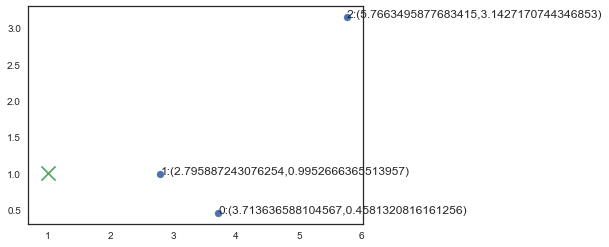

In [30]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=init_centroids[:,0], y= init_centroids[:,1])

for i, node in enumerate(init_centroids):
    ax.annotate('{}:({},{})'.format(i, node[0], node[1]), node)
ax.scatter(x[0], x[1], marker='x', s=200)
plt.show()

In [33]:
_find_your_cluster(x, init_centroids)

1

# 1 epoch cluster assigning¶


In [36]:
C = assign_cluster(data2, init_centroids)

data_with_c = combine_data_C(data2, C)
data_with_c.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


,X1,X2,C
0,1.842080,4.607572,1
1,5.658583,4.799964,2
2,6.352579,3.290854,2
3,2.904017,4.612204,2
4,3.231979,4.939894,2


See the first round clustering result

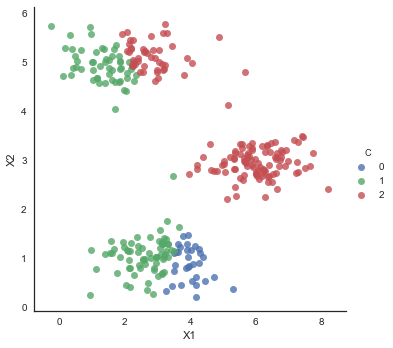

In [37]:
sns.lmplot('X1', 'X2', hue = 'C', data=data_with_c, fit_reg=False)
plt.show()

# calculate new centroid

In [40]:
new_centroids(data2, C)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([[3.97325554, 0.88530093],
       [2.0386062 , 2.75735015],
       [5.0166892 , 3.64583821]])

# putting all together, take1

this is just 1 shot k-means, if the random init pick the bad starting centroids, the final clustering may be very sub-optimal

In [45]:
final_C, final_centroid, _ = _k_means_iter(data2, 3)

data_with_c = combine_data_C(data2, final_C)

running epoch0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


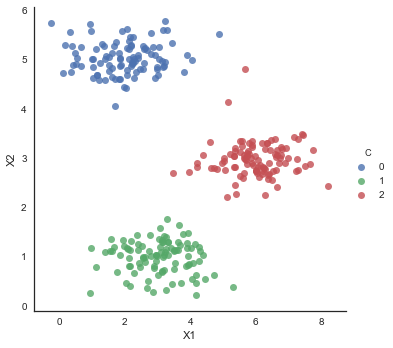

In [46]:
sns.lmplot('X1', 'X2', hue='C', data= data_with_c, fit_reg=False)
plt.show()

# calculate the cost

In [48]:
cost(data2, final_centroid, final_C)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


4.174105587889262

# k-mean with multiple tries of randome init, pick the best one with least cost

In [49]:
best_C, best_centroids, least_cost = k_means(data2, 3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


running epoch0
running epoch0
running epoch0
running epoch0
running epoch0
running epoch0
running epoch0
running epoch0
running epoch0
running epoch0


In [50]:
least_cost

0.7947828185156183

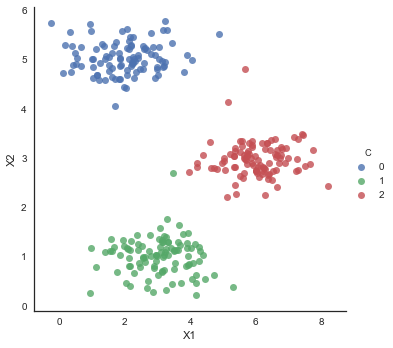

In [51]:
data_with_c = combine_data_C(data2, best_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

# try sklearn kmeans

In [52]:
from sklearn.cluster import KMeans

In [53]:
sk_kmeans = KMeans(n_clusters=3)

In [55]:
sk_kmeans.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
sk_C = sk_kmeans.predict(data2)

In [57]:
data_with_c = combine_data_C(data2, sk_C)

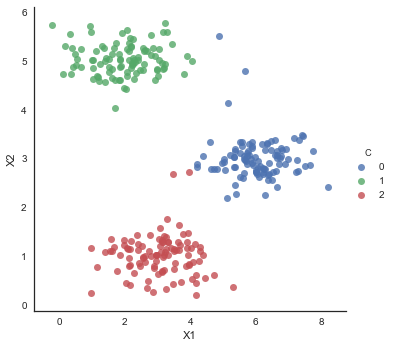

In [58]:
sns.lmplot('X1','X2', hue='C', data= data_with_c, fit_reg=False)
plt.show()